In [76]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from random import randint
import time

In [75]:
def rotateImage(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv.INTER_LINEAR)
    return result

In [104]:
def create_random_number(number):
    rotation = randint(-5, 5)
    img = np.zeros((28,28,3), np.uint8)
    
    scales = {
        1: 2,
        5: 1.5,
    }

    font                   = randint(0, 7)
    bottomLeftCornerOfText = (4,24)
    fontScale              = scales.get(font, 1)
    fontColor              = (255,255,255)
    lineType               = 2

    cv.putText(img, number, 
        bottomLeftCornerOfText, 
        font, 
        fontScale,
        fontColor,
        lineType)

    img = rotateImage(img, rotation)
    
    return img

img = create_random_number('6')
# for i in range(20):
    
#    plt.imshow(img)
#    print('i', i)

In [93]:
import matplotlib as mpl
# mpl.use('TkAgg')
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2 as cv
import plot_utils

from collections import defaultdict
from random import random, choice

import plot_utils
import mnist_data
import vae

In [2]:
img = cv.imread('results/PRR_epoch_29.jpg', 0)

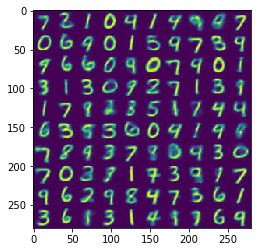

In [3]:
plt.imshow(img)

In [4]:
sub = img[:28, :28]

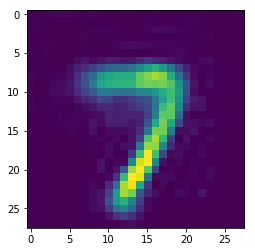

In [6]:
plt.imshow(sub)
IMAGE_SIZE = 28

In [94]:
def sp_noise(image, prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape, np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

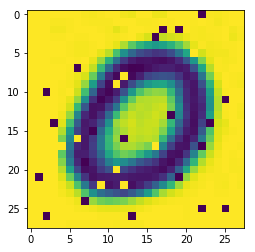

In [97]:
def get_number(image, index):
    if (index > 99):
        row, col = 0, 0
    else:
        row = int(index / 10)
        col = index % 10
    rotation = randint(-5, 5)
    number = image[
        IMAGE_SIZE * row:IMAGE_SIZE * (row + 1), 
        IMAGE_SIZE * col:IMAGE_SIZE * (col + 1),
    ]
    number = rotateImage(number, rotation)
    number = sp_noise(number, 0.03)
    return number

sub = get_number(img, 25)
res = cv.bitwise_not(sub)
# res = cv.bitwise_and(sub, sub, mask=res)
# print(sub)
# sub = cv.applyColorMap(sub, cv.COLORMAP_COOL)
# print('cv.COLORMAP_COOL', cv.COLORMAP_COOL)
plt.imshow(res)
# plt.imshow(sub)

In [85]:
train_total_data, train_size, _, _, test_data, test_labels = mnist_data.prepare_MNIST_data()

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
train_total_data [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [38]:
from random import choice
map_labels = defaultdict(list)

img = cv.imread('results/PRR_epoch_29.jpg', 0)

def get_label(arr):
    i = -1
    for i, x in enumerate(arr):
        if x == 1:
            break
    return i

In [41]:
for i in range(100):
    item = test_labels[i]
    map_labels[get_label(item)].append(i)

print('map_labels', map_labels)

map_labels defaultdict(<class 'list'>, {1: [2, 5, 14, 29, 31, 37, 39, 40, 46, 57, 74, 89, 94, 96], 2: [1, 35, 38, 43, 47, 72, 77, 82], 3: [18, 30, 32, 44, 51, 63, 68, 76, 87, 90, 93], 7: [0, 17, 26, 34, 36, 41, 60, 64, 70, 75, 79, 80, 83, 86, 97], 0: [3, 10, 13, 25, 28, 55, 69, 71], 4: [4, 6, 19, 24, 27, 33, 42, 48, 49, 56, 65, 67, 85, 95], 9: [7, 9, 12, 16, 20, 58, 62, 73, 78, 92, 99], 5: [8, 15, 23, 45, 52, 53, 59], 6: [11, 21, 22, 50, 54, 66, 81, 88, 91, 98], 8: [61, 84]})


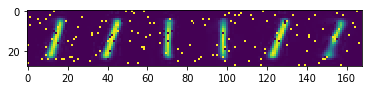

In [98]:
def get_captcha(input):
    input = str(input)
    captcha = []
    for s in input:
        i = int(s)
        x = choice(map_labels[i])
        sub = get_number(img, x)
        captcha.append(sub)
    return np.concatenate(captcha, axis=1)
        
        
sub = get_captcha(111111)
plt.imshow(sub)